In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/home/daniel/Documents/gw-between-spheres


In [2]:
from src.benchmarks import varied_dimension_run
from pathlib import Path
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

root_path = Path(".")
data_path = root_path / "fixed_samples_data"

In [3]:
sampling_strategy = "random"
samples = 100
n_trials = 20

with open(data_path / f"{sampling_strategy}_trials" / f"{sampling_strategy}_trials_n{n_trials}_s{samples}.json", "r") as f:
    raw_data = json.load(f)

In [10]:
gw_method = "pot_estimate"
metadata = raw_data["metadata"]
dim_range = metadata["dim_range"]
n_samples = metadata["num_samples"]
n_trials = metadata["n_trials"]
subsampling_strategy = metadata["subsampling_strategy"]

data = raw_data["data"]
def get_mean_res(gw_method: str):
    trials = {}
    for ix, m in enumerate(dim_range):
        trials[m] = {}
        for n in dim_range[:ix]:
            trials[m][n] = np.mean(list(
                map(lambda x: x[1][gw_method], data[str(m)][str(n)].items())
            ))
    return trials

In [11]:
pot_estimate_df = pd.DataFrame.from_dict(get_mean_res("pot_estimate")).dropna(
    axis=1, how="all"
)
ott_estimate_df = pd.DataFrame.from_dict(get_mean_res("ott_estimate_reg0.01")).dropna(
    axis=1, how="all"
)
true_df = pd.DataFrame.from_dict(get_mean_res("true_distance")).dropna(
    axis=1, how="all"
)

[None,
 Text(0.5, 1.0, 'Relative error of mean prediction of 20 trials,\nusing POT and random sampling.'),
 Text(0.5, 23.52222222222222, 'Larger sphere dimension'),
 Text(50.722222222222214, 0.5, 'Smaller sphere dimension')]

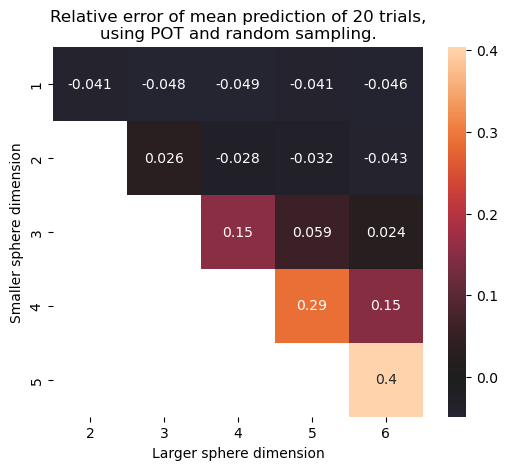

In [18]:
fig, ax = plt.subplots()
sns.heatmap((pot_estimate_df - true_df) / true_df, ax=ax, annot=True, center=0.)
ax.set(
    aspect="equal",
    title=f"Relative error of mean prediction of {n_trials} trials,\nusing POT and {subsampling_strategy} sampling.",
    xlabel="Larger sphere dimension",
    ylabel="Smaller sphere dimension",
    
)

[None]

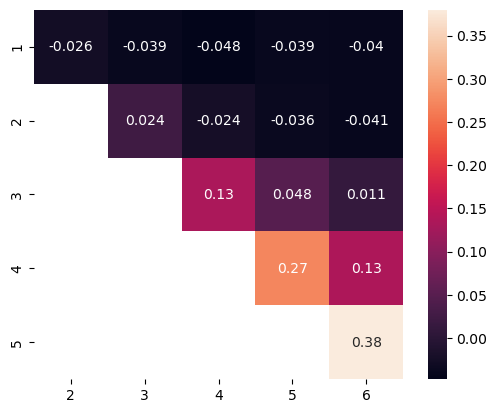

In [96]:
fig, ax = plt.subplots()
sns.heatmap((ott_estimate_df - true_df) / true_df, ax=ax, annot=True)
ax.set(aspect="equal")